# Табличные данные и взаимодействие с Excel

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Табличные данные и взаимодействие с Excel"
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.org/github/pybokeh/jupyter_notebooks/blob/main/xlwings/Excel_Formatting.ipynb
* https://xlsxwriter.readthedocs.io/
* https://xlsxwriter.readthedocs.io/working_with_conditional_formats.html
* https://xlsxwriter.readthedocs.io/example_conditional_format.html
* https://ru.excelfunctions.eu/
* https://docs.python.org/3/library/csv.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot
* https://analysistabs.com/excel-vba/colorindex/

## Задачи для совместного разбора

In [11]:
import xlsxwriter
import xlwings as xw
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

1. Создать файл `demo.xlsx` при помощи пакета `xlswriter` на основе данных из файла `costs.csv`.

2. На листе "Рецептура" файла `demo.xlsx` рассчитать себестоимость всех видов продукции. Результаты расчетов сохранить в отдельном столбце.

3. Выполнить 2 с помощью "протягиваемых" формул.

4. Добавить общий заголовок и доработать форматирование новых столбцов

## Лабораторная работа 4

1. При помощи пакета `xlsxwriter` создайте рабочую книгу под названием `recipes_model.xlsx`. 
Добавьте лист с названием "Модель". В первой строчке листа разместите следующие названия колонок: `"Сущность", "Атрибут", "Тип данных", "Обязательно к заполнению", "Описание сущности", "Описание атрибута", "Ключ", "Таблица для ссылки", "Поле для ссылки", "SQL"`.

* Не закрывайте рабочую книгу, она потребуется для выполнения следующего задания.

In [19]:
wb = xlsxwriter.Workbook('recipes_model.xlsx')
worksheet = wb.add_worksheet('Модель')
row, col = 0, 0
for item in ["Сущность", "Атрибут", "Тип данных", "Обязательно к заполнению", "Описание сущности", "Описание атрибута", "Ключ", "Таблица для ссылки", "Поле для ссылки", "SQL"]:
    worksheet.write(row, col, item)
    col += 1

2. При помощи пакета `xlsxwriter` добавьте условное форматирование на лист "Модель":
* если в ячейке столбца `G` указано значение "PK", то сделать заливку ячейки цвета  `#006600`, а цвет шрифта - `#fffff`.
* если в ячейке столбца `G` указано значение "FK", то сделать заливку ячейки цвета  `#cccc00`, а цвет шрифта - `#000000`.

Примените данные правила к диапазону `G2:G50`. Закройте рабочую книгу.

In [20]:
with open('data/recipes_model.csv', 'r', encoding='utf-8') as f:
    reader = csv.reader(f, delimiter='\t')
    data = list(reader)

format1 = wb.add_format({'bg_color': '#006600', 'font_color': '#fffff'})
format2 = wb.add_format({'bg_color': '#cccc00', 'font_color': '#000000'})

worksheet.conditional_format('G2:G50', {'type': 'cell', 'criteria': '=',
                                        'value': '"PK"', 'format': format1})
worksheet.conditional_format('G2:G50', {'type': 'cell', 'criteria': '=',
                                        'value': '"FK"', 'format': format2})

wb.close()

3. В файле `recipes_model.csv` находится модель данных предметной области "рецепты". При помощи пакета `csv` считайте эти данные. При помощи пакета `xlwings` запишите данные на лист `Модель` книги `recipes_model.xlsx`, начиная с ячейки `A2`, не используя циклы. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [21]:
wb = xw.Book('recipes_model.xlsx')
sheet = wb.sheets['Модель']

all_data = []
with open('data/recipes_model.csv', 'r', encoding='utf-8') as f:
    csv_reader = csv.reader(f, delimiter='\t')
    for row in csv_reader:
        all_data.append([None if item == '' else item for item in row])

sheet.range("A2").value = all_data
sheet.range("A1").expand().autofit()

<img src="data/Screenshot_0.png" />

4. При помощи пакета `xlwings` добавьте в столбец J формулу для описания столбца на языке SQL. Формула должна реализовывать следующую логику:

    1\. в начале строки идут значения из столбцов В и C (значение столбца С приведено к верхнему регистру), разделенные пробелом
    
    2\. далее идут слова на основе столбца "Ключ"
        2.1 если в столбце "Ключ" указано значение "PK", то дальше через пробел идет ключевое слово "PRIMARY KEY"
        2.2 если в столбце "Ключ" указано значение "FK", то дальше через пробел идет ключевое слово "REFERENCES", затем значения столбцов H и I в формате "название_таблицы(название_столбца)"
        
    3\. если в столбце "Обязательно к заполнению" указано значение "Y" и в столбце "Ключ" указано не "PK", то дальше через пробел идет ключевое слово "NOT NULL".

Заполните этой формулой необходимое количество строк, используя "протягивание". Количество строк для протягивания определите на основе данных.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [22]:
"""
Аналог формулы в Excel
"=ПРОПИСН(B2)&" "&ПРОПИСН(C2)&ЕСЛИМН(G2 = "PK";" PRIMARY KEY";G2 = "FK";" REFERENCES "&H2&"("&I2&")";D2 = "Y";" NOT NULL")"
"""

fml = xw.Range("J2").formula = '=UPPER(B2)&" "&UPPER(C2)&IFS(G2 = "PK"," PRIMARY KEY",G2 = "FK"," REFERENCES "&H2&"("&I2&")",D2 = "Y"," NOT NULL",D2 = "N","")'
xw.Range("J2:J18").formula = fml
xw.Range('J1').expand('down').autofit()

<img src="data/Screenshot_1.png" />

5. При помощи пакета `xlwings` измените стилизацию листа `Модель`.
* для заголовков добавьте заливку цвета `00ccff`
* примените автоподбор ширины столбца;
* сделайте шрифт заголовков полужирным;
* добавьте таблице автофильтр.

Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [23]:
Titles = sheet.range("A1:J1")
Titles.color = (0, 204, 255)
Titles.autofit()
for poz in Titles:
    if poz.column_width < 10:
        poz.column_width = 10
Titles.font.bold = True
Titles.api.AutoFilter(Field:=1)
wb.save()

<img src="data/Screenshot_2.png" />

6. В данных, полученных из файла `recipes_model.csv`, имеются ошибки двух видов:

    1\. Для некоторых полей, указанных как первичный ключ, в столбце "Обязательно к заполнению" стоит значение "N";

    2\. Для некоторых полей, указанных как внешний ключ, не указана таблица для ссылки и поле для ссылки.

Получите данные из листа в виде `pd.DataFrame`. Найдите строки на листе, которые содержат ошибки первого или второго рода и сделайте заливку эти строк цвета `(255, 102, 102)`. Сделайте скриншот текущего состояния листа и прикрепите в ячейку ноутбука.

In [24]:
df = pd.read_excel("recipes_model.xlsx", sheet_name="Модель")
df

,Сущность,Атрибут,Тип данных,Обязательно к заполнению,Описание сущности,Описание атрибута,Ключ,Таблица для ссылки,Поле для ссылки,SQL
0,recipe,name,varchar(100),Y,Рецепт,Название рецепта,NaN,NaN,NaN,NAME VARCHAR(100) NOT NULL
1,recipe,id,serial,N,Рецепт,ID рецепта,PK,NaN,NaN,ID SERIAL PRIMARY KEY
2,recipe,minutes,int,Y,Рецепт,Длительность выполнения в минутах,NaN,NaN,NaN,MINUTES INT NOT NULL
3,recipe,contributor_id,int,Y,Рецепт,ID автора рецепта,FK,user,id,CONTRIBUTOR_ID INT REFERENCES user(id)
4,recipe,submitted,timestamp,Y,Рецепт,Дата добавления,NaN,NaN,NaN,SUBMITTED TIMESTAMP NOT NULL
5,recipe,n_steps,int,N,Рецепт,Кол-во шагов рецепта,NaN,NaN,NaN,N_STEPS INT
6,recipe,description,text,N,Рецепт,Описание рецепта,NaN,NaN,NaN,DESCRIPTION TEXT
7,recipe,n_ingredients,int,N,Рецепт,Кол-во ингредиентов в рецепта,NaN,NaN,NaN,N_INGREDIENTS INT
8,review,id,serial,Y,Отзыв,ID отзыва,PK,NaN,NaN,ID SERIAL PRIMARY KEY
9,review,user_id,int,Y,Отзыв,ID автора отзыва,FK,NaN,NaN,USER_ID INT REFERENCES ()


In [25]:
d1 = df.loc[:,"Ключ"]+df.loc[:,"Обязательно к заполнению"]
d2 = (df.loc[:,"Таблица для ссылки"].notna() * df.loc[:,"Поле для ссылки"].notna() * -1 + 1) * df.loc[:,"Ключ"]=="FK"
indexes = df[d2].index.append(d1[d1=="PKN"].index)
for i in indexes:
    sheet.range(f"A{i+2}:J{i+2}").color = (255, 22, 22)

<img src="data/Screenshot_3.png" />

7. При помощи пакета `xlwings` создайте лист с названием `Ошибки заполнения`. 

Поместите в первой строчке этого листа заголовки "№ строки" и "Ошибка". Заполните лист на основе решения задачи 6. В столбце "№ строки" укажите номер строки с листа `Модель`, содержащую ошибку, а в столбце "Ошибка" для ошибок первого рода напишите сообщение "Первичный ключ не может быть NULL", для ошибок второго рода - "Не указано поле для связи по внешнему ключу". Сделайте скриншот состояния листа `Ошибки заполнения` и прикрепите в ячейку ноутбука.

In [27]:
errors = wb.sheets.add(name='Ошибки заполнения')
errors.range("A1").value = ['№ ошибки', 'Ошибка']
errors.range("A2").value = [(index, 'Первичный ключ не может быть NULL') for index in d1[d1 == "PKN"].index] + [(index, 'Ошибка заполнения') for index in df[d2].index]
xw.Range("A1").expand().autofit()

<img src="data/Screenshot_4.png" />

8. Посчитайте количество атрибутов для каждой из сущностей. Создайте лист `Статистика` и запишите в него результат группировки, начиная с ячейки "А1". Визуализируйте полученный результат при помощи столбчатой диаграммы. Сохраните полученную визуализацию на лист `Статистика`, начиная с ячейки "E2".  Сделайте скриншот листа `Статистика` и прикрепите в ячейку ноутбука.

* Вы можете воспользоваться методами для визуализации, которые поставляются вместе с объектами `pandas` (см. <a href="https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot"/>здесь</a> )

In [28]:
discribe = df[["Сущность", "Атрибут"]].groupby(["Сущность"], group_keys=True).describe()
discribe

Атрибут                  
           count unique   top freq
Сущность                          
recipe         8      8  name    1
review         6      6    id    1
user           3      3    id    1

In [30]:
try:
    discribe_sheet = wb.sheets.add(name="Статистика")
    discribe_sheet.range("A1").value = discribe
except ValueError:
    discribe_sheet = wb.sheets["Статистика"]

<BarContainer object of 3 artists>

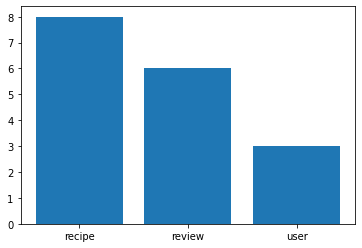

In [31]:
fig = plt.figure()
plt.bar(discribe["Атрибут", "count"].index, discribe["Атрибут", "count"])

In [32]:
discribe_sheet.pictures.add(fig, name='MyPlot', update=True, anchor=discribe_sheet.range("E2"))

<Picture 'MyPlot' in <Sheet [recipes_model.xlsx]Статистика>>

<img src="data/Screenshot_5.png" />